![title](https://meterpreter.org/wp-content/uploads/2017/12/pytorch-logo-dark-1024x205.png)

In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt

# Data (preparing and loading)

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [3]:
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
steps = 0.02

X = torch.arange(start, end, steps).unsqueeze(1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Split data into training and test sets

<table>
  <tr>
    <th>Split</th>
    <th>Purpose</th>
    <th>Amount of total data</th>
    <th>How often is it used?</th>

  </tr>
  <tr>
    <td>Training set</td>
    <td>The model learns from this data (like the course materials you study during the semester).</td>
    <td>~60-80%</td>
          <td>Always</td>
  </tr>
  <tr>
    <td>Validation set</td>
    <td>The model gets tuned on this data (like the practice exam you take before the final exam)</td>
    <td>~10-20%</td>
    <td>Often but not always</td>
  </tr>  
  
  <tr>
    <td>Testing set</td>
    <td>The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).</td>
    <td>~10-20%</td>
    <td>Always</td>
  </tr>
</table>

In [6]:
# Create train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

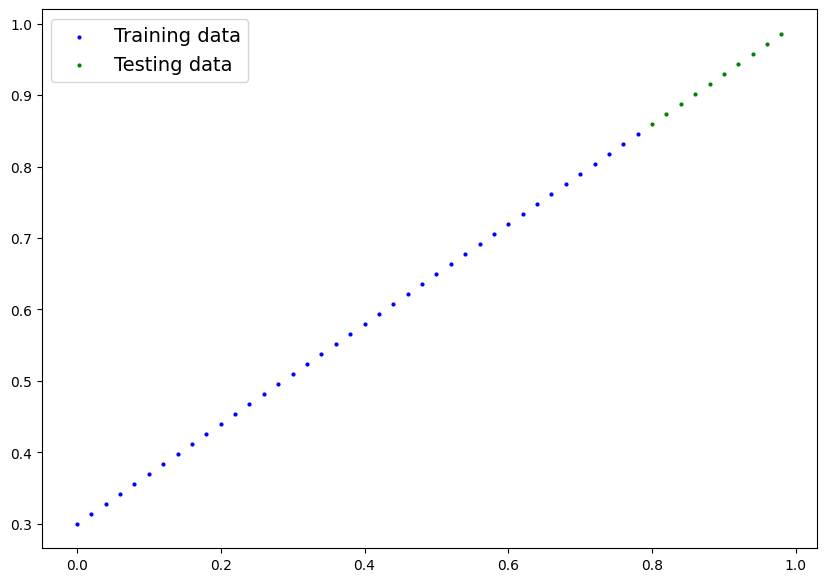

In [8]:
plot_predictions();

# Build model

In [9]:
from torch import nn

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

#### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.
They are:
- torch.nn
- torch.optim
- torch.utils.data.Dataset and 
- torch.utils.data.DataLoader.

<table>
  <tr>
    <th>PyTorch module</th>
    <th>What does it do?</th>

  </tr>
  <tr>
    <td><b>torch.nn</b></td>
    <td>Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).</td>
    
  </tr>
  <tr>
    <td><b>torch.nn.Parameter</b></td>
    <td>Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".</td>
   
  </tr>  
  
  <tr>
    <td><b>torch.nn.Module</b></td>
    <td>The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.</td>
  </tr>

   <tr>
    <td><b>torch.optim</b></td>
    <td>Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).</td>
  </tr>

   <tr>
    <td><b>def forward()</b></td>
    <td>All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).</td>
  </tr>
</table>

![title](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)

In [11]:
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

In [12]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.4874])), ('bias', tensor([0.7754]))])

### Making predictions using `torch.inference_mode()`

In [13]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

## INFERENCE_MODE
InferenceMode is a new context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps.

In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.1653],
        [1.1750],
        [1.1848],
        [1.1945],
        [1.2043],
        [1.2140],
        [1.2238],
        [1.2335],
        [1.2433],
        [1.2530]])


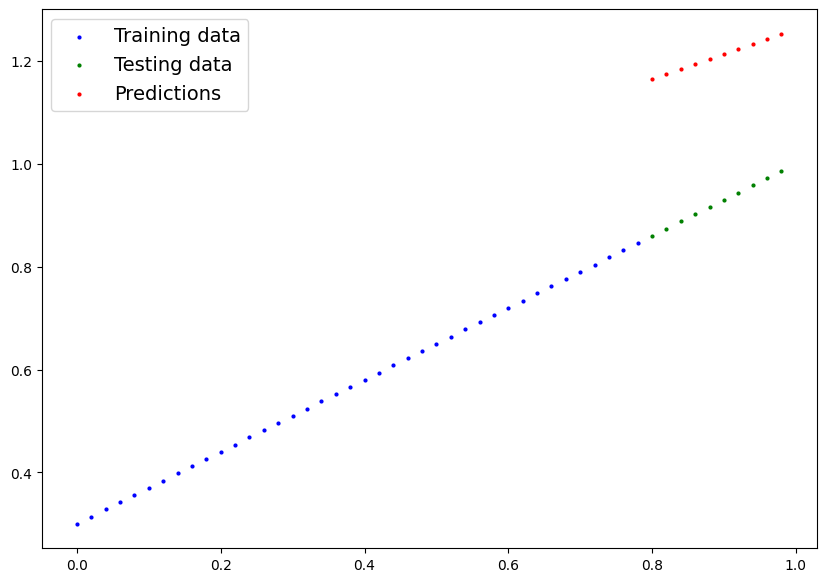

In [15]:
plot_predictions(predictions=y_preds)

Things we need to train the model are:
- Loss Function
- Optimizer
- Training Loop (particular to pytorch)
- Testing Loop (particular to pytorch)

<table>
  <tr>
    <th>Function</th>
    <th>What does it do?</th>
    <th>Where does it live in PyTorch?</th>
          <th>Common values</th>

  </tr>
  <tr>
    <td>Loss function</td>
    <td>Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.</td>
    <td>PyTorch has plenty of built-in loss functions in torch.nn</td>
    <td>Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).</td>
  </tr>
  <tr>
    <td>Optimizer</td>
    <td>Tells your model how to update its internal parameters to best lower the loss.</td>
    <td>You can find various optimization function implementations in torch.optim.</td>
    <td>Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).</td>
  </tr>
</table>

In [16]:
#setup loss function and optimizer
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### PyTorch training loop
For the training loop, we'll build the following steps:

<table border="1">
    <tr>
        <th>Number</th>
        <th>Step Name</th>
        <th>What Does It Do?</th>
        <th>Code Example</th>
    </tr>
    <tr>
        <td>1</td>
        <td>Forward pass</td>
        <td>The model goes through all of the training data once, performing its forward() function calculations.</td>
        <td><code>model(x_train)</code></td>
    </tr>
    <tr>
        <td>2</td>
        <td>Calculate the loss</td>
        <td>The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.</td>
        <td><code>loss = loss_fn(y_pred, y_train)</code></td>
    </tr>
    <tr>
        <td>3</td>
        <td>Zero gradients</td>
        <td>The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.</td>
        <td><code>optimizer.zero_grad()</code></td>
    </tr>
    <tr>
        <td>4</td>
        <td>Perform backpropagation on the loss</td>
        <td>Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".</td>
        <td><code>loss.backward()</code></td>
    </tr>
    <tr>
        <td>5</td>
        <td>Update the optimizer (gradient descent)</td>
        <td>Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.</td>
        <td><code>optimizer.step()</code></td>
    </tr>
</table>
e>

In [29]:
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

## Training

# 1. Loop Through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate The loss
    loss = loss_fn(y_pred, y_train)
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt the parameters of the model (calculate gradients of each parameters)
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() 

    ## Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}')


Epoch: 0 | MAE Train Loss: 0.043739330023527145 | MAE Test Loss: 0.10120339691638947
Epoch: 10 | MAE Train Loss: 0.04030957818031311 | MAE Test Loss: 0.09361772239208221
Epoch: 20 | MAE Train Loss: 0.03687451779842377 | MAE Test Loss: 0.08534518629312515
Epoch: 30 | MAE Train Loss: 0.033436086028814316 | MAE Test Loss: 0.0777595192193985
Epoch: 40 | MAE Train Loss: 0.030007636174559593 | MAE Test Loss: 0.06948696821928024
Epoch: 50 | MAE Train Loss: 0.026570897549390793 | MAE Test Loss: 0.06121443957090378
Epoch: 60 | MAE Train Loss: 0.023134151473641396 | MAE Test Loss: 0.053628791123628616
Epoch: 70 | MAE Train Loss: 0.01970571093261242 | MAE Test Loss: 0.04535623639822006
Epoch: 80 | MAE Train Loss: 0.01626727357506752 | MAE Test Loss: 0.0370836965739727
Epoch: 90 | MAE Train Loss: 0.012832221575081348 | MAE Test Loss: 0.02949804626405239
Epoch: 100 | MAE Train Loss: 0.00940246507525444 | MAE Test Loss: 0.02122550643980503
Epoch: 110 | MAE Train Loss: 0.005963658448308706 | MAE Test

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.3059]))])

In [31]:
weight, bias

(0.7, 0.3)

In [32]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

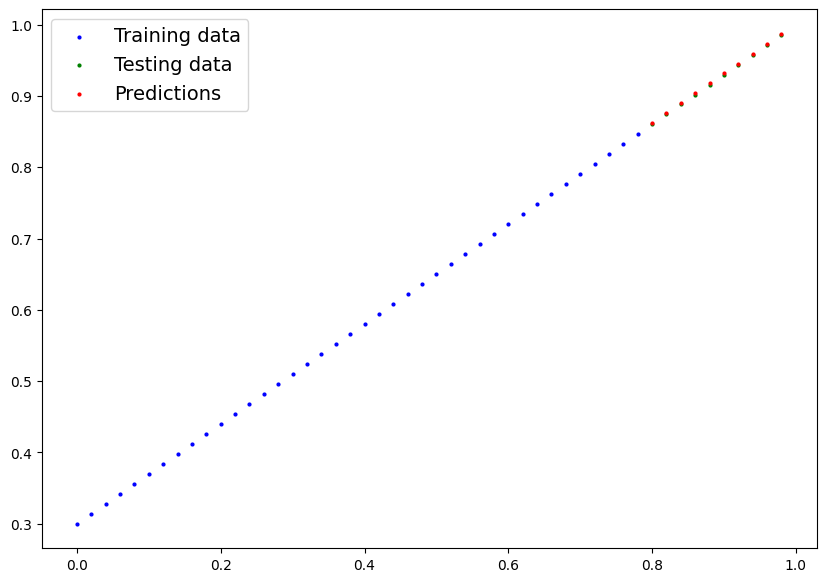

In [33]:
plot_predictions(predictions=y_pred_new)

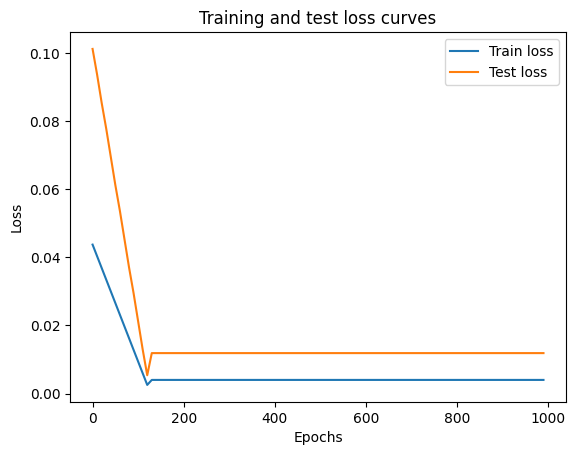

In [36]:
# Plot the loss curves

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

![title](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

# Save the model

<b>There are Primarly 3 ways of saving the model:</b>
<table border="0">
  <tr>
    <th>PyTorch method</th>
    <th>What does it do?</th>
  </tr>
  <tr>
    <td>torch.save</td>
    <td>Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.</td>
  </tr>
  <tr>
    <td>torch.load</td>
    <td>Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).</td>
  </tr>
  <tr>
    <td>torch.nn.Module.load_state_dict</td>
    <td>Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.</td>
  </tr>
</table>


In [41]:
from pathlib import Path
# 1. Create Model Directory
MODEL_PATH = Path('Model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model Save Path
MODEL_NAME = "01_Simple_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
# only saving the state_dict() only saves the models learned parameters
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to: Model\01_Simple_model.pth


## Why saving only state dict and not entire model?
The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...

Because of this, your code can break in various ways when used in other projects or after refactors.

# Loading a Model

In [45]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

# Test Loaded Model

In [47]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    

In [49]:
loaded_model_preds

tensor([[0.8620],
        [0.8759],
        [0.8898],
        [0.9037],
        [0.9176],
        [0.9315],
        [0.9455],
        [0.9594],
        [0.9733],
        [0.9872]])

In [52]:
y_preds = model_0(X_test)
y_preds

tensor([[0.8620],
        [0.8759],
        [0.8898],
        [0.9037],
        [0.9176],
        [0.9315],
        [0.9455],
        [0.9594],
        [0.9733],
        [0.9872]], grad_fn=<AddBackward0>)

In [53]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])